## Trabalho Prático - Python para Ciência de Dados

IFMG - Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais - Especialização em Inteligência Artificial  

Mat.: Python para Ciência de Dados 

Prof.: Rodrigo Silva 

Aluno: Christhian da S. Gonçalves 

## 01. Sobre o conjunto de dados

O conjunto principal é uma versão atualizada do conjunto de dados da Califórnia de 1990. Este conjunto de dados foi relatado pela primeira vez no artigo: Sparse Spatial Autoregressions de Pace, R. Kelley e Ronald Barry. Os autores usaram os dados do Censo de 1990. O conjunto de dados atualizado contém os dados coletados pelo American Community Survey de 5 anos do US Census Bureau (2009 - 2020) no nível do grupo de quarteirões.

Grupos de Blocos (BGs) são divisões estatísticas de setores censitários, geralmente definidos para conter entre 600 e 3.000 pessoas, e são usados ​​para apresentar dados e controlar a numeração dos blocos. As variáveis ​​escolhidas dentro de cada grupo de quarteirões são: população, domicílios, total de cômodos, total de dormitórios, valor médio das casas, faixas de renda e faixas etárias das estruturas habitacionais. As variáveis ​​são recuperadas em nível de estado, município, área e grupo de quarteirões.

Link: https://www.kaggle.com/datasets/ebelmagnin/housing?select=california_housing_updated.csv

O conjunto de dados secundário é relacionado a dados da cidade da California, e foi obtido os dados de altitude das cidades para usar como parte da base de dados de treinamento e de teste.

Link: https://www.kaggle.com/datasets/stephdon/california

## 02. Análise Exploratória dos Dados

### 2.1 Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### 2.2 Carregando base de dados

In [2]:
df_house = pd.read_csv("https://raw.githubusercontent.com/christhiangoncalves/Calculo_de_Preco_Casas_California/main/california_housing_updated.csv")
df_city = pd.read_csv("https://raw.githubusercontent.com/christhiangoncalves/Calculo_de_Preco_Casas_California/main/california_cities.csv")

### 2.3 Análise dos dados

##### Dados de 'df_house'

In [3]:
display(df_house.info(),'df_house.head()',df_house.head(),'df_house.isna().mean()',df_house.isna().mean(),'df_house.describe()',df_house.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25591 entries, 0 to 25590
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      25591 non-null  object 
 1   total_population          25591 non-null  float64
 2   total_households          25591 non-null  float64
 3   average_household_income  25591 non-null  float64
 4   average_house_age         25591 non-null  float64
 5   total_rooms               25557 non-null  float64
 6   total_bedrooms            25591 non-null  float64
 7   median_house_value        25591 non-null  float64
 8   longitude                 25591 non-null  float64
 9   latitude                  25591 non-null  float64
 10  ocean_proximity           25591 non-null  object 
dtypes: float64(9), object(2)
memory usage: 2.1+ MB


None

'df_house.head()'

,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
0,Alameda County,1713.0,644.0,150520.19,23.5,5300.0,723.0,1633100.0,-122.2344,37.8681,<1H OCEAN
1,Alameda County,1322.0,630.0,167222.22,16.7,4535.0,688.0,1126800.0,-122.2222,37.8587,NEAR BAY
2,Alameda County,940.0,417.0,171948.44,43.0,2800.0,429.0,1646200.0,-122.2480,37.8503,<1H OCEAN
3,Alameda County,1043.0,413.0,150914.04,38.6,2277.0,427.0,1418800.0,-122.2517,37.8457,NEAR BAY
4,Alameda County,1206.0,423.0,167677.30,36.9,2583.0,463.0,1447400.0,-122.2480,37.8450,<1H OCEAN


'df_house.isna().mean()'

name                        0.000000
total_population            0.000000
total_households            0.000000
average_household_income    0.000000
average_house_age           0.000000
total_rooms                 0.001329
total_bedrooms              0.000000
median_house_value          0.000000
longitude                   0.000000
latitude                    0.000000
ocean_proximity             0.000000
dtype: float64

'df_house.describe()'

,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude
count,25591.000000,25591.000000,25591.000000,25591.000000,2.555700e+04,25591.000000,2.559100e+04,25591.000000,25591.000000
mean,1537.494549,512.020398,92004.845269,26.505346,-3.388202e+06,555.310265,-6.236765e+07,-119.487318,35.535162
std,778.122087,234.890550,34058.549719,7.771489,4.742731e+07,255.106035,1.951191e+08,1.957278,2.078309
min,0.000000,0.000000,0.000000,0.000000,-6.666667e+08,0.000000,-6.666667e+08,-124.163400,32.545900
25%,1009.000000,348.000000,66177.610000,21.600000,1.908000e+03,376.000000,2.984000e+05,-121.640100,33.931000
50%,1421.000000,475.000000,89021.440000,26.900000,2.639000e+03,514.000000,4.814000e+05,-118.591100,34.260900
75%,1940.000000,640.500000,115609.600000,32.100000,3.634000e+03,694.000000,7.351500e+05,-117.950950,37.680550
max,39373.000000,7133.000000,212500.000000,45.500000,4.649700e+04,7960.000000,2.000001e+06,-114.346700,41.746200


In [4]:
#Adicionando a média de 'total_rooms' aos campos vazios em 'total_rooms'
df_house['total_rooms'].fillna(df_house['total_rooms'].mean(),inplace=True)
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25591 entries, 0 to 25590
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      25591 non-null  object 
 1   total_population          25591 non-null  float64
 2   total_households          25591 non-null  float64
 3   average_household_income  25591 non-null  float64
 4   average_house_age         25591 non-null  float64
 5   total_rooms               25591 non-null  float64
 6   total_bedrooms            25591 non-null  float64
 7   median_house_value        25591 non-null  float64
 8   longitude                 25591 non-null  float64
 9   latitude                  25591 non-null  float64
 10  ocean_proximity           25591 non-null  object 
dtypes: float64(9), object(2)
memory usage: 2.1+ MB


In [5]:
#Transformando categorias em pesos numéricos
idprox,prox = df_house['ocean_proximity'].factorize()
df_house['ocean_proximity_sort'] = idprox
display(df_house['ocean_proximity'].value_counts(), df_house['ocean_proximity_sort'].value_counts())


ocean_proximity
INLAND        12939
<1H OCEAN      6457
NEAR OCEAN     3885
NEAR BAY       2303
ISLAND            7
Name: count, dtype: int64

ocean_proximity_sort
2    12939
0     6457
3     3885
1     2303
4        7
Name: count, dtype: int64

In [6]:
#Para normalizr os dados é realizado a média de quartos por familia, para trazer informação util
df_house['total_rooms_/_total_households'] = df_house['total_rooms'] /df_house['total_households']
df_house['median_incame'] = df_house['average_household_income'] /df_house['total_households']
del df_house['total_rooms'] 
del df_house['total_households']
del df_house['ocean_proximity']
del df_house['average_household_income']
df_house

,name,total_population,average_house_age,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity_sort,total_rooms_/_total_households,median_incame
0,Alameda County,1713.0,23.5,723.0,1633100.0,-122.2344,37.8681,0,8.229814,233.727003
1,Alameda County,1322.0,16.7,688.0,1126800.0,-122.2222,37.8587,1,7.198413,265.432095
2,Alameda County,940.0,43.0,429.0,1646200.0,-122.2480,37.8503,0,6.714628,412.346379
3,Alameda County,1043.0,38.6,427.0,1418800.0,-122.2517,37.8457,1,5.513317,365.409298
4,Alameda County,1206.0,36.9,463.0,1447400.0,-122.2480,37.8450,0,6.106383,396.400236
...,...,...,...,...,...,...,...,...,...,...
25586,Yuba County,1135.0,21.2,590.0,496500.0,-121.3437,39.2926,2,6.867257,152.752761
25587,Yuba County,841.0,23.9,590.0,215500.0,-121.1380,39.4516,2,7.016173,167.410135
25588,Yuba County,953.0,24.6,425.0,246800.0,-121.3199,39.4271,2,6.087302,118.627698
25589,Yuba County,957.0,29.1,594.0,266700.0,-121.2128,39.4224,2,7.982103,144.925906


##### Dados de 'df_city'

In [7]:
display(df_city.info(),'df_city.head()',df_city.head(),'df_city.isna().mean',df_city.isna().mean(),'df_city.describe()',df_city.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


None

'df_city.head()'

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


'df_city.isna().mean'

Unnamed: 0            0.000000
city                  0.000000
latd                  0.000000
longd                 0.000000
elevation_m           0.099585
elevation_ft          0.024896
population_total      0.000000
area_total_sq_mi      0.004149
area_land_sq_mi       0.000000
area_water_sq_mi      0.002075
area_total_km2        0.010373
area_land_km2         0.008299
area_water_km2        0.008299
area_water_percent    0.010373
dtype: float64

'df_city.describe()'

,Unnamed: 0,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
count,482.000000,482.000000,482.000000,434.000000,470.000000,4.820000e+02,480.000000,482.000000,481.000000,477.000000,478.000000,478.000000,477.000000
mean,240.500000,36.095088,-119.837714,180.416705,567.168723,6.489493e+04,18.442183,16.840981,1.589630,46.753283,43.547021,3.125178,5.301801
std,139.285678,2.298006,2.147676,309.531825,1001.265722,2.032041e+05,36.363230,32.694647,9.490386,90.972269,84.933022,11.562269,14.656428
min,0.000000,32.578333,-124.263333,-34.000000,-180.000000,1.000000e+00,0.314000,0.314000,0.000000,0.813000,0.813000,0.000000,0.000000
25%,120.250000,33.977292,-121.954931,22.000000,69.000000,1.090200e+04,3.708250,3.506500,0.000000,9.551000,9.025000,0.000250,0.000000
50%,240.500000,36.204722,-119.708611,67.000000,200.000000,2.905750e+04,9.093000,8.362000,0.029000,23.551000,21.533000,0.078500,0.340000
75%,360.750000,37.886667,-117.977292,173.500000,515.000000,6.646650e+04,19.878250,19.090000,0.244000,51.772000,49.322000,0.623250,1.870000
max,481.000000,41.965000,-114.596389,2402.000000,7880.000000,3.884307e+06,503.000000,469.000000,185.020000,1302.000000,1214.000000,122.270000,84.580000


In [8]:
#Realizado o tratamento das colunas do nome da cidade para realizar o merge de forma correta
df_house['nameid'] = df_house['name'].str.replace(' County', '')
df_city['nameid'] = df_city['city'].str.replace('Valley', '').str.replace(
                    'City', '').str.replace('ville', '').str.replace('Hills', '').str.replace(
                    'San', 'San ').str.replace('Los', 'Los ').str.replace('Santa', 'Santa ')

df_city_select = df_city[['elevation_m','nameid']]

In [9]:
#Realizando o merge dos dataframes
df_merged_h_c = pd.merge(df_house, df_city_select, left_on='nameid', right_on='nameid', how='left')
df_merged_h_c

,name,total_population,average_house_age,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity_sort,total_rooms_/_total_households,median_incame,nameid,elevation_m
0,Alameda County,1713.0,23.5,723.0,1633100.0,-122.2344,37.8681,0,8.229814,233.727003,Alameda,NaN
1,Alameda County,1322.0,16.7,688.0,1126800.0,-122.2222,37.8587,1,7.198413,265.432095,Alameda,NaN
2,Alameda County,940.0,43.0,429.0,1646200.0,-122.2480,37.8503,0,6.714628,412.346379,Alameda,NaN
3,Alameda County,1043.0,38.6,427.0,1418800.0,-122.2517,37.8457,1,5.513317,365.409298,Alameda,NaN
4,Alameda County,1206.0,36.9,463.0,1447400.0,-122.2480,37.8450,0,6.106383,396.400236,Alameda,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
25586,Yuba County,1135.0,21.2,590.0,496500.0,-121.3437,39.2926,2,6.867257,152.752761,Yuba,18.0
25587,Yuba County,841.0,23.9,590.0,215500.0,-121.1380,39.4516,2,7.016173,167.410135,Yuba,18.0
25588,Yuba County,953.0,24.6,425.0,246800.0,-121.3199,39.4271,2,6.087302,118.627698,Yuba,18.0
25589,Yuba County,957.0,29.1,594.0,266700.0,-121.2128,39.4224,2,7.982103,144.925906,Yuba,18.0


In [10]:
df_merged_h_c.isna().mean()

name                              0.000000
total_population                  0.000000
average_house_age                 0.000000
total_bedrooms                    0.000000
median_house_value                0.000000
longitude                         0.000000
latitude                          0.000000
ocean_proximity_sort              0.000000
total_rooms_/_total_households    0.000000
median_incame                     0.005236
nameid                            0.000000
elevation_m                       0.336798
dtype: float64

In [11]:
#Foi inserido a média da elevação nos valores faltantes, que correspondem a 9% dos dados da coluna 'elevation_m'
df_merged_h_c['elevation_m'].fillna(df_city['elevation_m'].mean(),inplace=True)
del df_merged_h_c['name']
del df_merged_h_c['nameid']
df_merged_h_c = df_merged_h_c.round(2)
df_merged_h_c.describe()

,total_population,average_house_age,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity_sort,total_rooms_/_total_households,median_incame,elevation_m
count,25591.000000,25591.000000,25591.000000,2.559100e+04,25591.000000,25591.000000,25591.000000,25591.00,25457.000000,25591.000000
mean,1537.494549,26.505346,555.310265,-6.236765e+07,-119.487303,35.535187,1.557735,NaN,232.570892,121.127036
std,778.122087,7.771489,255.106035,1.951191e+08,1.957263,2.078265,1.027911,NaN,561.250340,94.000155
min,0.000000,0.000000,0.000000,-6.666667e+08,-124.160000,32.550000,0.000000,-inf,8.650000,-18.000000
25%,1009.000000,21.600000,376.000000,2.984000e+05,-121.640000,33.930000,0.000000,4.72,124.310000,59.000000
50%,1421.000000,26.900000,514.000000,4.814000e+05,-118.590000,34.260000,2.000000,5.64,182.650000,71.000000
75%,1940.000000,32.100000,694.000000,7.351500e+05,-117.950000,37.680000,2.000000,6.60,271.730000,180.420000
max,39373.000000,45.500000,7960.000000,2.000001e+06,-114.350000,41.750000,4.000000,inf,53125.000000,755.000000


## 03. Visualização de dados

In [12]:
#sns.pairplot(df_merged_h_c)

<Axes: >

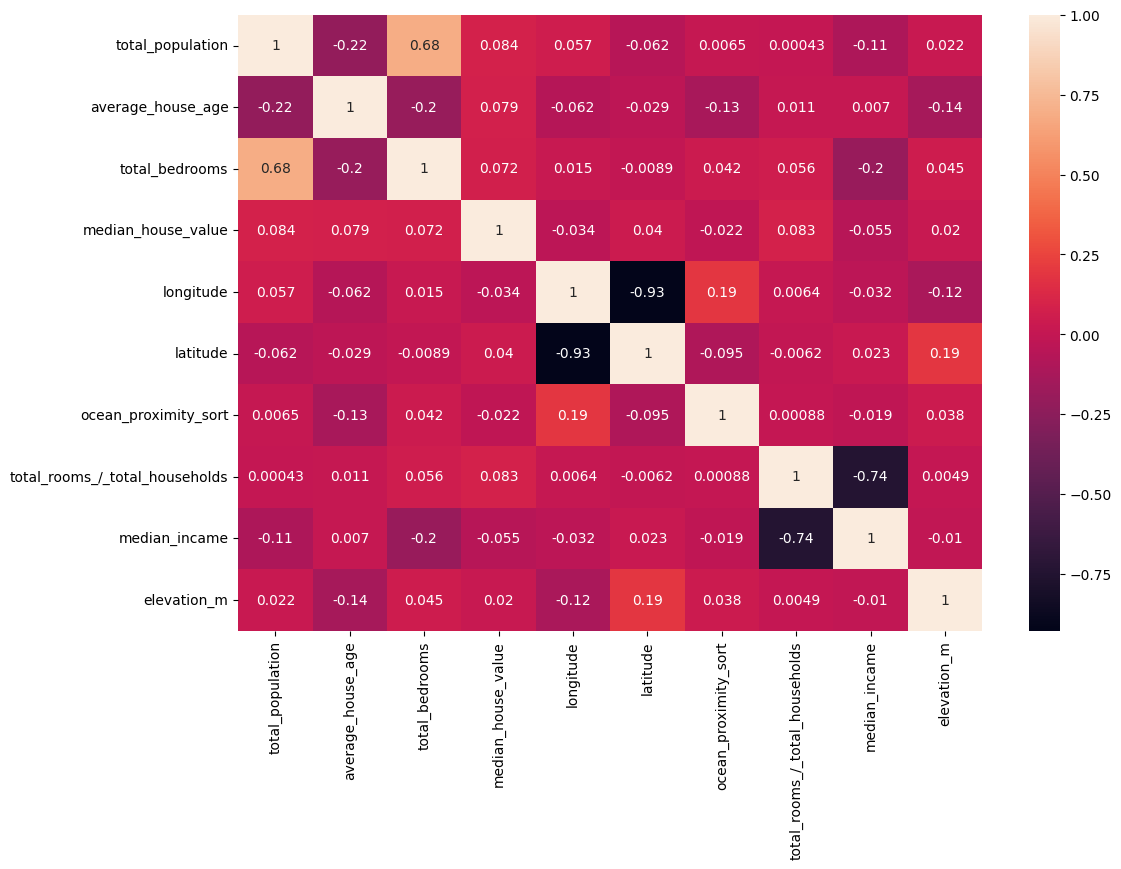

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df_merged_h_c.corr(),annot=True)

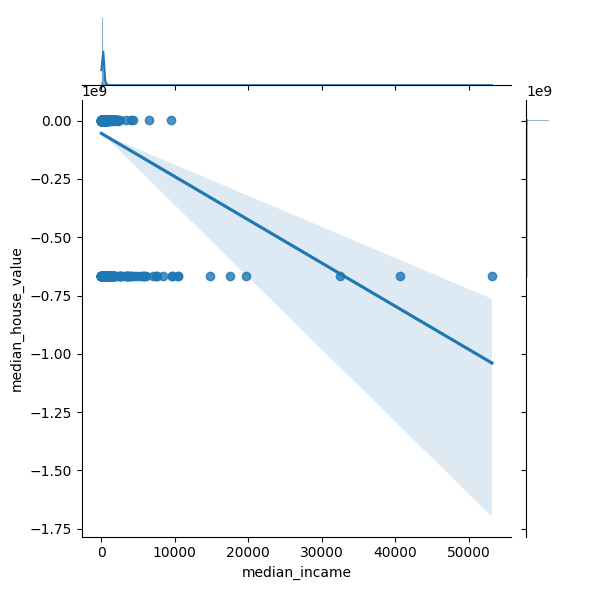

In [14]:
sns.jointplot(data=df_merged_h_c,y='median_house_value',x='median_incame',kind='reg')

In [15]:
sns.jointplot(data=df_merged_h_c,x='median_house_value',y='total_rooms_/_total_households',kind='reg',ylim=20)

In [ ]:
#retirando outliers
df_merged_h_c.drop(df_merged_h_c[df_merged_h_c['total_rooms_/_total_households']>20].index.to_list(),axis=0,inplace=True)
df_merged_h_c.shape

In [ ]:
df_merged_h_c.plot(kind='scatter', x='longitude', y='latitude',alpha=0.4,c='median_house_value',cmap=plt.get_cmap("jet"))